In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import r2_score






In [144]:
df=pd.read_csv(r'used_cars_data.csv')
df.sample()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6749,6749,Honda Amaze SX i-VTEC,Delhi,2015,11000,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,NaN,NaN


In [145]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [146]:
# showes Columns Data Type
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [147]:
# The .describe() method in Python, especially in libraries like Pandas, provides a summary of the main statistical measures for a DataFrame or Series.
df.describe()


,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [148]:
# shows dimentions of our Data frame

df.shape

(7253, 14)

In [149]:
# showes columns Names
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [150]:
# Showe last 5 data from our data frame
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [151]:
null_counts=df.isnull().sum()
print(null_counts)

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64


In [198]:
# df['Seats'].fillna(0, inplace=True)
# df['Power'].fillna(0, inplace=True)
# df['Engine'].fillna(0, inplace=True)
# df['Mileage'].fillna(0, inplace=True)
# df['Kilometers_Driven'].fillna(0, inplace=True)

df.fillna({'Seats': 0, 'Power': 0, 'Engine': 0, 'Mileage': 0, 'Kilometers_Driven': 0,'Price':0,'Numeric Price in Lakh':0}, inplace=True)

In [199]:
null_counts=df.isnull().sum()
print(null_counts)

S.No.                    0
Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_Price                0
Price                    0
date_column              0
Numeric Price in Lakh    0
car_age                  0
dtype: int64


In [157]:
# Drop Rows with Missing Values
df.dropna()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
10,10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,10.65 Lakh,9.95
15,15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.01 Lakh,15.00
20,20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,47.87 Lakh,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,5999,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0,7.77 Lakh,4.00
6002,6002,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09 kmpl,1598 CC,103.5 bhp,5.0,11.91 Lakh,3.25
6005,6005,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,9.93 Lakh,7.43
6010,6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,6.63 Lakh,3.20


In [158]:
# Drop Columns with Missing Values
df.dropna(axis=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0


In [159]:
# Fill with a Specific Value
df.fillna(0)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,0,0.00
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,0,0.00
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,0,0.00
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,0,0.00


In [160]:
# fill the null columns with mean values
df['New_Price'].fillna(df['Price'].mean(), inplace=True)
df.head()


C:\Users\ACC\AppData\Local\Temp\ipykernel_20580\2472623526.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['New_Price'].fillna(df['Price'].mean(), inplace=True)


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,9.479468,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,9.479468,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,9.479468,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,9.479468,17.74


In [161]:
# Forward Fill: Fills missing values with the last known value in the column.

df.fillna(method='ffill')

C:\Users\ACC\AppData\Local\Temp\ipykernel_20580\293155395.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,9.479468,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,9.479468,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,9.479468,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,9.479468,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,9.479468,2.50
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,9.479468,2.50
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.479468,2.50
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,9.479468,2.50


In [162]:
# Backward Fill: Fills missing values with the next known value in the column.
df.fillna(method='bfill')

C:\Users\ACC\AppData\Local\Temp\ipykernel_20580\2829278347.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,9.479468,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,9.479468,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,9.479468,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,9.479468,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,9.479468,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,9.479468,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.479468,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,9.479468,NaN


In [163]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [S.No., Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price]
Index: []


In [164]:
data_no_duplicates = df.drop_duplicates()
print(data_no_duplicates)

      S.No.                                               Name    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type

In [165]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [166]:
df.sample()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6759,6759,Maruti A-Star Vxi,Jaipur,2009,87000,Petrol,Manual,Second,19.0 kmpl,998 CC,66.1 bhp,5.0,9.479468,NaN


In [167]:
# Convert to datetime (date and time)
data=df['date_column'] = pd.to_datetime(df['Year'])


In [168]:
df['Numeric Price in Lakh'] = pd.to_numeric(df['Price'], errors = 'coerce')

In [169]:
from datetime import datetime

In [170]:
current_year = datetime.now().year

# Calculate car age and store it in a new column
df['car_age'] = current_year - df['Year']

# Display the updated DataFrame with the new column
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,date_column,Numeric Price in Lakh,car_age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,9.479468,1.75,1970-01-01 00:00:00.000002010,1.75,14
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,9.479468,12.50,1970-01-01 00:00:00.000002015,12.50,9
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1970-01-01 00:00:00.000002011,4.50,13
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,9.479468,6.00,1970-01-01 00:00:00.000002012,6.00,12
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,9.479468,17.74,1970-01-01 00:00:00.000002013,17.74,11


In [171]:
# If we want to know the statical measures of a specific column we can use this method

data=df['Kilometers_Driven']
mean = data.mean()
median = data.median()
std_dev = data.std()
iqr = data.quantile(0.75) - data.quantile(0.25)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"IQR: {iqr}")

Mean: 58699.063146284294
Median: 53416.0
Standard Deviation: 84427.72058265154
IQR: 39000.0


In [172]:
# Convert Engine to numeric
# Convert Engine to numeric
df['Engine'] = df['Engine'].astype(str).str.replace(' CC', '', regex=False)
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

# Convert Power to numeric
df['Power'] = df['Power'].astype(str).str.replace(' bhp', '', regex=False)
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

df['Mileage'] = pd.to_numeric(df['Mileage'].str.replace(' km/kg', '').str.replace(' kmpl', '').astype(str), errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

**Univeriant Analysis**

<Axes: xlabel='Kilometers_Driven'>

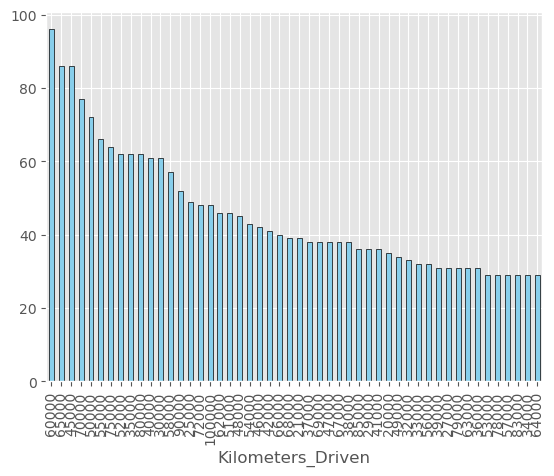

In [173]:
#barChart
df['Kilometers_Driven'].value_counts()\
.head(50)\
.plot(kind='bar',color='skyblue', edgecolor='black')

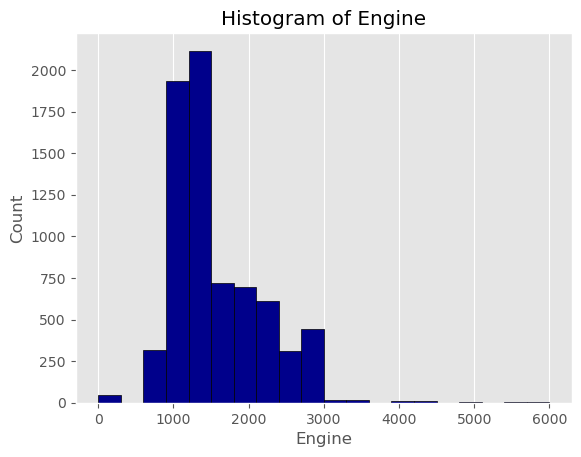

In [174]:
plt.hist(df['Engine'], bins=20, color='Darkblue', edgecolor='black')
plt.title('Histogram of Engine')
plt.xlabel('Engine')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

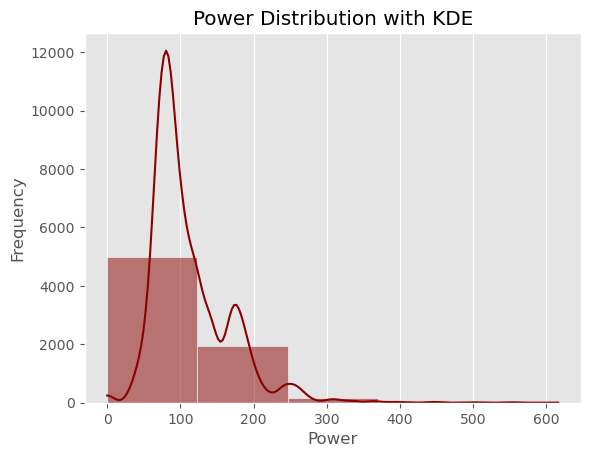

In [175]:
sns.histplot(df['Power'], bins=5, kde=True, color='darkred')
plt.title('Power Distribution with KDE')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# KDE stands for Kernel Density Estimate. 
# It's a way of estimating the probability density function of a continuous variable, which essentially shows where data points are concentrated along the range of values.
#  Instead of just counting occurrences in bins (as in a histogram), KDE gives a smooth curve that helps visualize the underlying distribution.

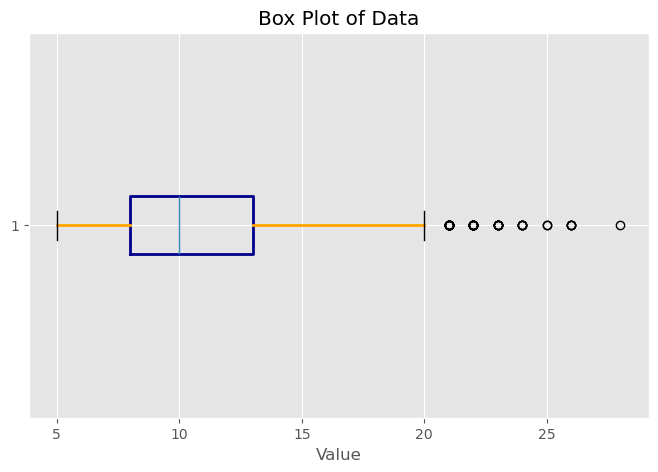

In [176]:
# Box Plot
plt.figure(figsize=(8, 5))
plt.boxplot(df['car_age'], vert=False,boxprops=dict(color='darkblue', linewidth=2), whiskerprops=dict(color='orange', linewidth=2))
plt.title("Box Plot of Data")
plt.xlabel("Value")
plt.show()

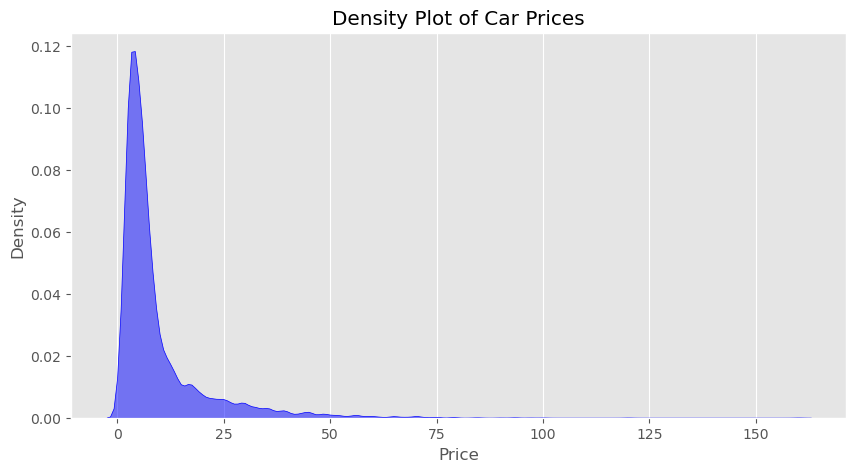

In [177]:
# Density Plot 
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Price'], color='blue', fill=True, bw_adjust=0.5, alpha=0.5)
plt.title('Density Plot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(axis='y')
plt.show()

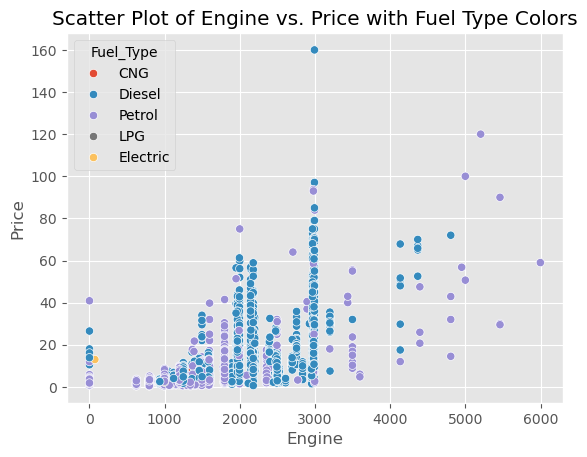

In [178]:
sns.scatterplot(x='Engine', y='Price', data=df, hue='Fuel_Type')  # Replace 'Fuel_Type' with your categorical column
plt.title("Scatter Plot of Engine vs. Price with Fuel Type Colors")
plt.xlabel("Engine")
plt.ylabel("Price")
plt.show()

In [186]:
df.sample()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,date_column,Numeric Price in Lakh,car_age
3843,3843,Hyundai Accent GLE,Mumbai,2010,32773,Petrol,Manual,First,13.2,1495,94.0,5.0,9.479468,2.05,1970-01-01 00:00:00.000002010,2.05,14


In [192]:
X = df['Year'].values
Y = df['car_age'].values
Z = df['Kilometers_Driven'].values

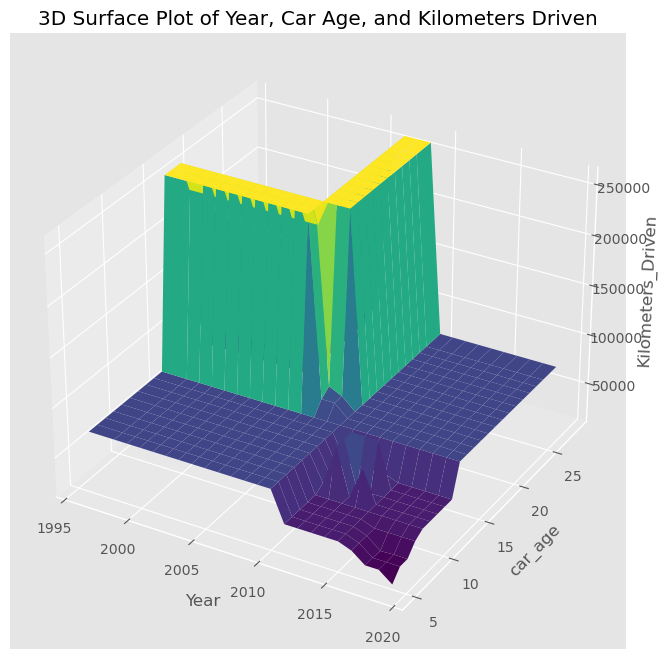

In [ ]:
# Create a grid
X_grid, Y_grid = np.meshgrid(np.unique(X), np.unique(Y))
Z_grid = np.zeros_like(X_grid)

# Interpolating the Z values
for i in range(X_grid.shape[0]):
    for j in range(X_grid.shape[1]):
        # Find nearest values to fill the grid
        nearest_idx = np.argmin(np.abs(X - X_grid[i, j]) + np.abs(Y - Y_grid[i, j]))
        Z_grid[i, j] = Z[nearest_idx]

# Create the 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('car_age')
ax.set_zlabel('Kilometers_Driven')
ax.set_title('3D Surface Plot of Year, Car Age, and Kilometers Driven')

plt.show()


# This code snippet prepares a grid for a 3D surface plot by interpolating values of Kilometers Driven based on the unique combinations of Year and Car Age. 

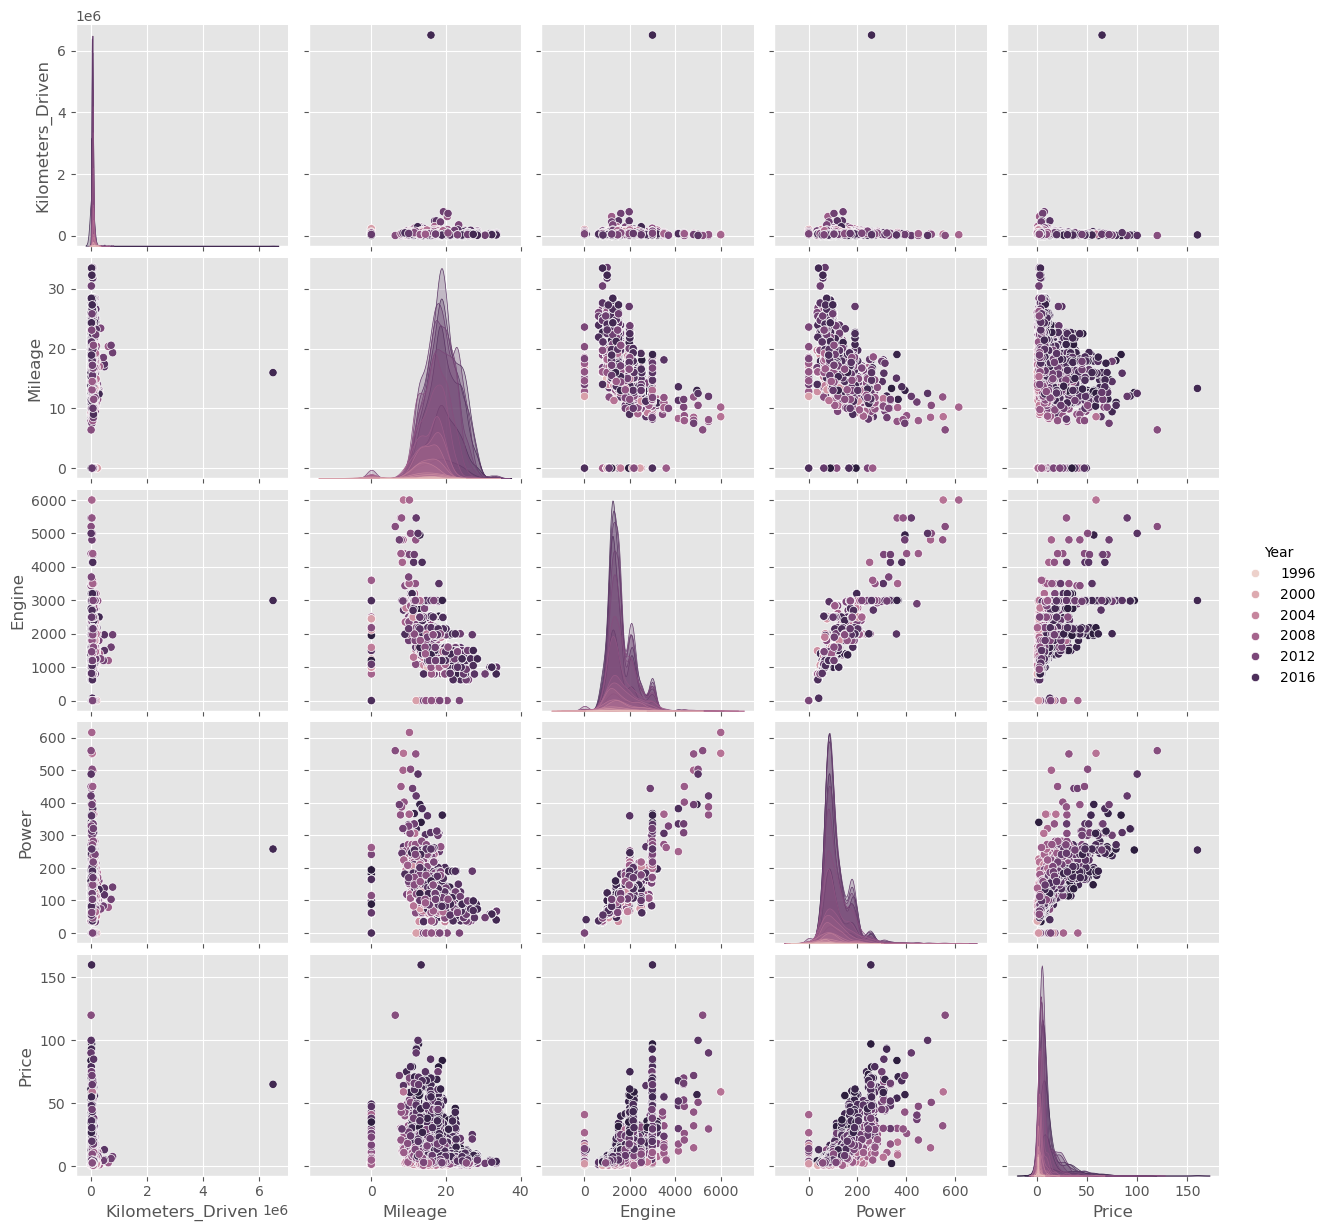

In [182]:
sns.pairplot(df , vars=['Kilometers_Driven','Mileage','Engine','Power','Price',],hue='Year')
plt.show()

# this code generates a comprehensive grid of scatter plots to explore the relationships between Kilometers_Driven, Mileage, Engine, Power, and Price in your dataset.
# By coloring the points according to the Year of production

In [184]:
df_corr = df[['Year','Kilometers_Driven','Mileage','Engine','Power','Price','car_age']].dropna().corr()
df_corr

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,car_age
Year,1.000000,-0.169905,0.294852,-0.044351,0.031085,0.298753,-1.000000
Kilometers_Driven,-0.169905,1.000000,-0.060799,0.089323,0.031722,-0.008495,0.169905
Mileage,0.294852,-0.060799,1.000000,-0.587218,-0.502375,-0.333085,-0.294852
Engine,-0.044351,0.089323,-0.587218,1.000000,0.869886,0.646809,0.044351
Power,0.031085,0.031722,-0.502375,0.869886,1.000000,0.764445,-0.031085
Price,0.298753,-0.008495,-0.333085,0.646809,0.764445,1.000000,-0.298753
car_age,-1.000000,0.169905,-0.294852,0.044351,-0.031085,-0.298753,1.000000


<Axes: >

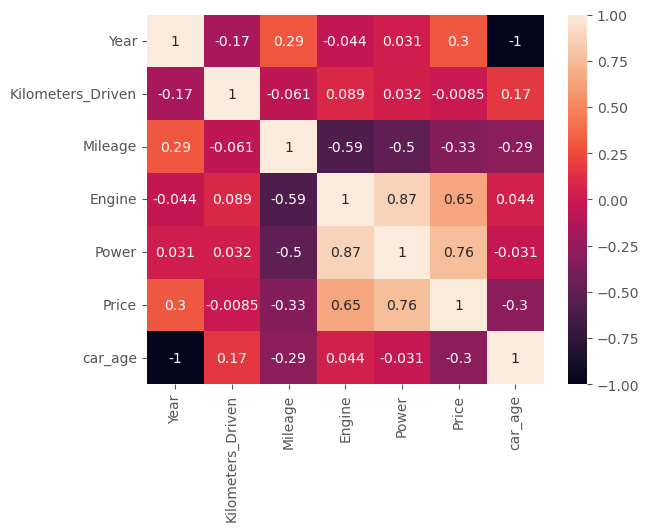

In [185]:
sns.heatmap(df_corr,annot=True)

LINEAR REGRESSION

In [243]:
df.sample()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,date_column,Numeric Price in Lakh,car_age,cluster
3914,3914,Maruti Swift Dzire Tour LDI,Kolkata,2015,168205,Diesel,Manual,First,23.4,1248,74.0,5.0,9.479468,4.0,1970-01-01 00:00:00.000002015,4.0,9,0


In [236]:
x = np.array(df.Year).reshape(-1, 1) # input or we can call it feature also  
y = np.array(df.car_age).reshape(-1, 1) # out put or target variable 

# what the reshape will do is that we have a list of salary [1,2,4,5] for example, it will change it to [ [1,2,4,5] ] - which is 2D array

print(x)
print(y)

[[2010]
 [2015]
 [2011]
 ...
 [2012]
 [2013]
 [2014]]
[[14]
 [ 9]
 [13]
 ...
 [12]
 [11]
 [10]]


In [237]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=0)
model = LinearRegression().fit(x_train,y_train )

In [238]:
model.predict([[2016] ,[2010],[1957],[2000]])

array([[ 8.],
       [14.],
       [67.],
       [24.]])

In [239]:
y_pred = model.predict(x_test)
y_pred

array([[10.],
       [ 7.],
       [ 7.],
       ...,
       [16.],
       [ 7.],
       [13.]])

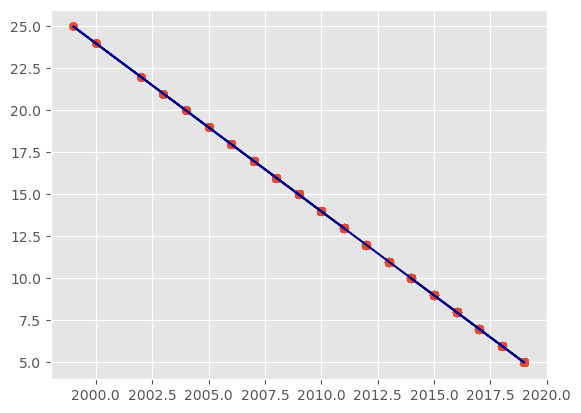

In [240]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='darkblue')

In [292]:

r2=r2_score(y_test,y_pred)
r2

-0.1301731118379017

Logistic Regression

In [244]:
df.sample()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,date_column,Numeric Price in Lakh,car_age,cluster
6368,6368,Toyota Innova 2.5 VX (Diesel) 7 Seater,Kolkata,2016,105000,Diesel,Manual,First,12.99,2494,100.6,7.0,9.479468,0.0,1970-01-01 00:00:00.000002016,0.0,8,2


In [279]:
le = LabelEncoder()
df['Owner_Type'] = le.fit_transform(df['Owner_Type'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

In [280]:
X = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Fuel_Type']]
y = df['Owner_Type']

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [282]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [283]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [272]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [284]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [277]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')


Accuracy: 0.84
Confusion Matrix:
[[1193    1   23    0]
 [   0    0    2    0]
 [ 191    0   19    1]
 [  13    0    8    0]]
Classification Report:


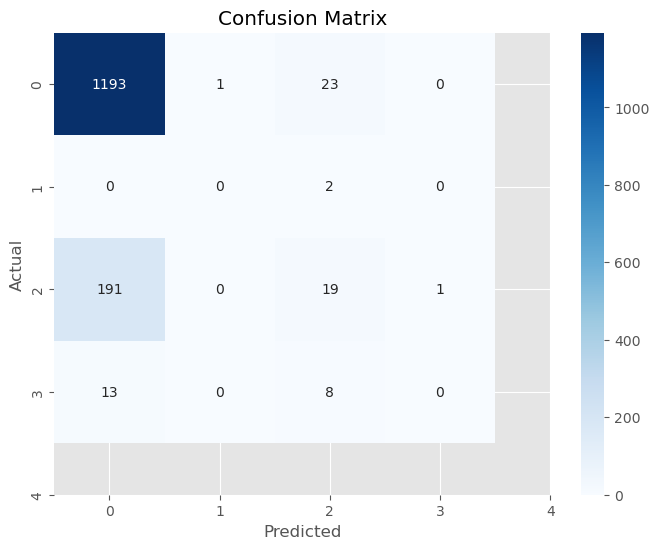

In [285]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# roc_auc = roc_auc_score(y_test, y_pred_proba)

# # Plotting the ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')

K-Means

In [208]:
k = 2
# km = KMeans(n_clusters=k, random_state=10)  
km = KMeans(n_clusters=3, random_state=42, n_init=10)



y_predicted = km.fit_predict(df[['Engine', 'Price']])
y_predicted


array([0, 0, 0, ..., 0, 0, 2])

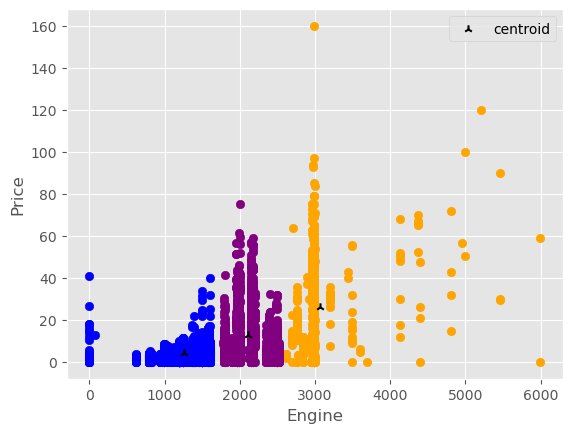

In [242]:
df['cluster']=y_predicted
df.head()

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Engine,df1['Price'],color='Blue')
plt.scatter(df2.Engine,df2['Price'],color='Orange')
plt.scatter(df3.Engine,df3['Price'],color='Purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='2',label='centroid')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.legend()
